In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.table import Table

In [2]:
t = Table.read('TGAS_d125_Wright03_2Mass', format='votable')
print(t.colnames)


Source = t["Source"]
Gmag = t["__Gmag_"]
Vmag = t["VTmag"]
Jmag = t["Jmag"]
Hmag = t["Hmag"]
Kmag = t["Kmag"]
Qfl = t["Qfl"]
DistW = t["Dist"]
d1 = t["d_arcsec"]
d2 = t["d_arcsec_2"]
Dup = t["Dup"]

#Remove Wright et Al sources > 4"
for i in range(0, len(DistW)):
    if(DistW[i] > 4.0):
        row = t[i]
        cols = row._table.columns.values()
        for col in cols:
            col.mask[i] = True
for i in range(0, len(DistW)):
    if (DistW[i] > 4.0):
        print(i,DistW[i])
#test = DistW.compressed()

#Remove Duplicate Matches
for c in range(0, len(Dup)):
    if(Dup.mask[c] ==False):
        if(Dup[c] > 0.5):
            row = t[c]
            cols = row._table.columns.values()
            for dupcol in cols:
                dupcol.mask[c] = True
test = Dup.compressed()
#print(len(test))

#print(len(Dup))
#print(len(DistW))

#print(t['Dup'])

for x in range(0,len(Qfl)):
    if(Source.mask[i] ==False):
        if(Qfl[i][0] == ord("A")):
            Jmag.mask[i] = False
        else:
            Jmag.mask[i] = True
        if(Qfl[i][1] == ord("A")):
            Hmag.mask[i] = False
        else:
            Hmag.mask[i] = True
        if(Qfl[i][2] == ord("A")):
            Kmag.mask[i] = False
        else:
            Kmag.mask[i] = True

print("Sources: ", len(Jmag))



WARNING

['d_arcsec', '_2MASS', 'RAJ2000', 'DEJ2000', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD', 'd_arcsec_2', '_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var', '_RAJ2000_2', '_DEJ2000_2', 'TYC1', 'TYC2_2', 'TYC3', 'RAJ2000_2', 'DEJ2000_2', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType']
Sources:  31437


: W32: TGAS_d125_Wright03_2Mass:48:0: W32: Duplicate ID '_DEJ2000' renamed to '_DEJ2000_2' to ensure uniqueness [astropy.io.votable.tree]


In [23]:
Test = Source.compressed()
unique = set()
Gdups = set()

for i in range(0,len(Test)):
    if(Test[i] in unique):
        print("GAIA Duplicate Source: ",Test[i])
        Gdups.add(Test[i])
    else:
        unique.add(Test[i])
print("Finished GAIA Duplicate Check. Found: ", len(Gdups))

for i in range(0,len(Source)):
    if(Source.mask[i] == False):
        Name = Source[i]
        if(Name in Gdups):
            row = t[i]
            idx = row._index
            cols = row._table.columns.values()
            for col in cols:
                col.mask[i] = True
print("Finished masking all GAIA duplicates. All sources involved")
TwoM = t["_2MASS"]
unique = set()
Tdups = set()
Test = TwoM.compressed()
for i in range(0,len(Test)):
    if(Test[i] in unique):
        print("2MASS Duplicate Source: ",Test[i])
        Tdups.add(Test[i])
    else:
        unique.add(Test[i])
print("Finished 2MASS Duplicate Check. Found: ", len(Tdups))

for i in range(0,len(TwoM)):
    if(Source.mask[i] == False):
        Name = TwoM[i]
        if(Name in Tdups):
            row = t[i]
            idx = row._index
            cols = row._table.columns.values()
            for col in cols:
                col.mask[i] = True
print("Finished masking all 2MASS duplicates. All sources involved")
Test = Source.compressed()
print("Remaining valid sources: ",len(Test))


Finished GAIA Duplicate Check. Found:  0
Finished masking all GAIA duplicates. All sources involved
Finished 2MASS Duplicate Check. Found:  0
Finished masking all 2MASS duplicates. All sources involved
Remaining valid sources:  19986


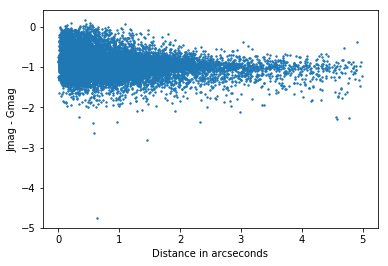

2.32789585653
4.37082289104


In [6]:
JmG = Jmag - Gmag
StanD = np.std(JmG)
for i in range(0,len(JmG)):
    if(JmG[i] > StanD):
        JmG.mask[i] = True
    else:
        JmG.mask[i] = False
plt.scatter(d1,JmG,s=2.0)
plt.xlabel("Distance in arcseconds")
plt.ylabel("Jmag - Gmag")
plt.show()
print(np.mean(JmG))
print(np.std(JmG))


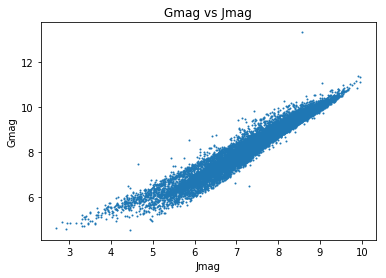

In [49]:
plt.title("Gmag vs Jmag")
plt.scatter(Jmag,Gmag,s=1.0)
plt.xlabel("Jmag")
plt.ylabel("Gmag")
plt.show()


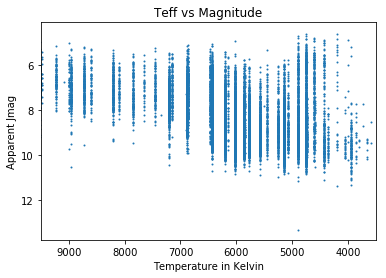

In [19]:
# Plot of Magnitude vs Teff
Teff = t["Teff"]
plt.title("Teff vs Magnitude")
plt.scatter(Teff,Gmag,s=1.0)
plt.xlabel("Temperature in Kelvin")
plt.ylabel("Apparent Jmag")
plt.xlim(3500,9500)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

In [21]:
SpType = t['SpType']
print(SpType)

 SpType
-------
     G5
 G2/3 V
   K0 V
     K0
     --
   G0 V
     --
   G8 V
     K0
     --
    ...
     F0
     --
   G0 V
     --
     --
     F2
     --
 F6/7 V
     G5
F8/G1 V
     --
Length = 31437 rows


In [17]:
StarTest = []
for i in range(0,len(Teff)):
    if(5000 <= Teff <= 5500):
        StarTest[i].append(Teff[i])
    

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()